In [1]:
import numpy as np
import keras
from keras.models import Model
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D
import tensorflow.keras.preprocessing.image as prep #데이터 Augmentation, 하면 좋은거임

Using TensorFlow backend.


In [2]:
def VGG16_Brief(classes=2): # classes = 감지할 클래스 수
    img_rows, img_cols = 224, 224
    img_channels = 3    
    img_dim = (img_rows, img_cols, img_channels) #차원..shape 정의..
    
    img_input = Input(shape=img_dim) #튜플.. 변경 x
    x = Conv2D(64,(3,3),padding='same',activation = 'relu')(img_input) #1층
    x = Conv2D(64,(3,3),padding='same',activation = 'relu')(x) #2층
    x = MaxPooling2D((2,2),strides=(2,2))(x) #2층 maxpool

    x = Conv2D(128,(3,3),padding='same',activation = 'relu')(x) #3층
    #x = Conv2D(128,(3,3),padding='same',activation = 'relu')(x) #4층
    x = MaxPooling2D((2,2),strides=(2,2))(x) #4층 maxpool

    x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) #5층
    #x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) #6층
    x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) #7층
    x = MaxPooling2D((2,2),strides=(2,2))(x) #7층 maxpool

    #x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #8층
    #x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #9층
    #x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #10층
    #x = MaxPooling2D((2,2),strides=(2,2))(x) #10층 maxpool

    #x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #11층
    #x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #12층
    #x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #13층
    #x = MaxPooling2D((2,2),strides=(2,2))(x) #13층 maxpool

    x = Flatten()(x)
    x = Dense(256, activation = 'relu')(x) #14층
    x = Dense(256, activation = 'relu')(x) #15층
    x = Dense(classes, activation = 'softmax')(x)
    
    model = Model(inputs=img_input, output = x)
    return model

In [3]:
model = VGG16_Brief(classes = 2)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2951

C:\Users\notou\Anaconda3\envs\tf_gpu_10\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [4]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
#데이터 증강
cat_dog_data_dir='C:\dataset\data_100'

train_datagen = prep.ImageDataGenerator(
rescale=1./255, #normalization
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
cat_dog_data_dir,
target_size=(224,224),
batch_size=32,
shuffle=True,
class_mode='categorical'
)

Found 2000 images belonging to 2 classes.


In [7]:
for data, labels in train_generator:
    print(labels)
    break

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [11]:
#learnung rate 조정 필요할 시 조정해주는 code
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.1, 
                                            min_lr=0.00001)

In [12]:
history = model.fit(train_generator, epochs = 10, callbacks=[learning_rate_reduction])

Epoch 1/10
63/63 [==============================] - 35s 561ms/step - loss: 0.7077 - accuracy: 0.5045
Epoch 2/10
63/63 [==============================] - 26s 415ms/step - loss: 0.6748 - accuracy: 0.5540
Epoch 3/10
63/63 [==============================] - 27s 425ms/step - loss: 0.6640 - accuracy: 0.6010
Epoch 4/10
63/63 [==============================] - 25s 397ms/step - loss: 0.6409 - accuracy: 0.6580
Epoch 5/10
63/63 [==============================] - 25s 399ms/step - loss: 0.6073 - accuracy: 0.6680
Epoch 6/10
63/63 [==============================] - 25s 400ms/step - loss: 0.5903 - accuracy: 0.6905
Epoch 7/10
63/63 [==============================] - 26s 411ms/step - loss: 0.5636 - accuracy: 0.7095
Epoch 8/10
63/63 [==============================] - 25s 394ms/step - loss: 0.5401 - accuracy: 0.7345
Epoch 9/10
63/63 [==============================] - 25s 395ms/step - loss: 0.5201 - accuracy: 0.7490
Epoch 10/10
63/63 [==============================] - 26s 410ms/step - loss: 0.5042 - accura

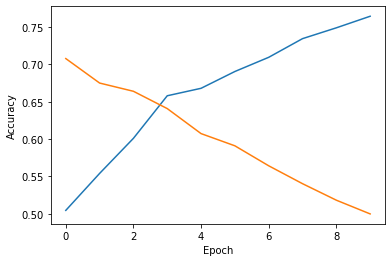

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], label= 'recall 1')
plt.plot(history.history['loss'])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [8]:
from keras.preprocessing import image
img = image.load_img("catt4.png",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

output = model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

NameError: name 'plt' is not defined